##**Introduction**##


The dataset is all about Olympics data which contains details about name of athlete,age ,represting which country(belongsto),in which date and year they have played,in which sports they have participated and different types of medals like gold,silver ,brone type of medals they won and total medals

lets analyise the data to get required insights

In [ ]:
#Installing Pyspark library
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
sc

<SparkContext master=local[*] appName=sample_app>

##Write PySpark code to read the olympix_data.csv file?

In [ ]:
# reading given dataset using spark into dataframe df
df=spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header.csv")
# to show the output
df.show(10)

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
|   Alicia Coutts| 24|    Australia|2012|08-12-2012|  Swimming|         1|           3|          1|     

In [ ]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



In [ ]:
# checking for total records
df.count()

8618

In [ ]:
# dropping duplicates if any
df1=df.dropDuplicates()
df1.count()

8615

There are 3 duplicates which were dropped

In [ ]:
# dropping missing if any
df1=df1.na.drop()
df1.count()

8613

There are two missing values records which were dropped

In [ ]:
from pyspark.sql.types import TimestampType
df = df.withColumn("Date_Given",df["Date_Given"].cast(TimestampType()))
df.printSchema()


root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: timestamp (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import udf,col
#converting name column to list
li1= df1.select('name').rdd.flatMap(lambda x: x).collect()
#empty list for collecting special characters
Cleaned_name=[]
for i in li1:
   for j in i:
    if(j.isalpha()==True):
      continue
    else:
      if j in Cleaned_name:
        continue
      else:
        Cleaned_name.append(j)
Cleaned_name.remove(" ")

def name_cleaned(x):
  for i in Cleaned_name:
      data = x.replace(i,"")
      return data

a=udf(name_cleaned)
df1=df.withColumn("name",a(col("name")))
df1.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008|      null|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004|      null|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|      null|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008|      null|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|      null|          Gymnastics|         2|           1|          3|     

##Write PySpark code to print the Olympic Sports/games in the dataset?

In [ ]:
df1.select("sports").distinct().show()

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



##Write PySpark code to plot the total number of medals in  each Olympic Sport/game?

In [ ]:
from pyspark.sql.functions import desc
df2=df1.groupBy("sports").sum('total_medal')
df2.show()

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
+--------------------+----------------+
only showing top 20 rows



In [ ]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df3=df2.toPandas()
df3

,sports,sum(total_medal)
0,Gymnastics,282
1,Tennis,78
2,Boxing,188
3,Short-Track Speed Skating,138
4,Ice Hockey,384
5,Rowing,576
6,Judo,224
7,Softball,134
8,Sailing,210
9,Swimming,765


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

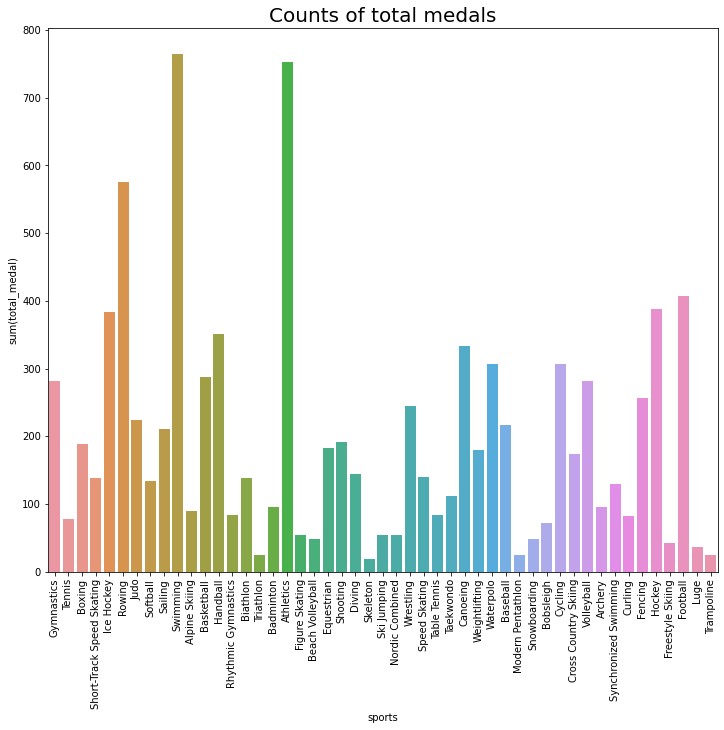

In [ ]:
#defining the size of plot
fig = plt.figure(figsize=(12,10))
sns.barplot(x = "sports",y = "sum(total_medal)",data =df3)

plt.title('Counts of total medals', fontsize=20)
plt.xticks(rotation=90)

We can say from both result and plot sport swimming takes takes more total medals

##Sort the result based on the total number of medals?

In [ ]:
#sorting total no of medals by each sport
res=df2.sort("sum(total_medal)",ascending = [False]).show()

+----------+----------------+
|    sports|sum(total_medal)|
+----------+----------------+
|  Swimming|             765|
| Athletics|             753|
|    Rowing|             576|
|  Football|             407|
|    Hockey|             388|
|Ice Hockey|             384|
|  Handball|             351|
|  Canoeing|             333|
| Waterpolo|             306|
|   Cycling|             306|
|Basketball|             287|
|Gymnastics|             282|
|Volleyball|             281|
|   Fencing|             256|
| Wrestling|             245|
|      Judo|             224|
|  Baseball|             216|
|   Sailing|             210|
|  Shooting|             192|
|    Boxing|             188|
+----------+----------------+
only showing top 20 rows



##Find the total number of medals won by each country in swimming?

In [ ]:
# calculating total no of medals by each country in swimming
df1.filter(df1["sports"]=='Swimming').groupBy("country").sum("total_medal").orderBy(desc("sum(total_medal)")).show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|United States|             267|
|    Australia|             163|
|  Netherlands|              46|
|        Japan|              43|
|       France|              39|
|        China|              35|
|      Germany|              32|
|       Russia|              20|
|        Italy|              16|
|Great Britain|              11|
| South Africa|              11|
|       Sweden|               9|
|      Hungary|               9|
|       Brazil|               8|
|      Ukraine|               7|
|     Zimbabwe|               7|
|      Romania|               6|
|       Canada|               5|
|  South Korea|               4|
|        Spain|               3|
+-------------+----------------+
only showing top 20 rows



##Find the total number of medals won by each country in Skeleton?

In [ ]:
# calculating total no of medals by each country in skeleton
df1.filter(df1["sports"]=='Skeleton').groupBy("country").sum("total_medal").orderBy(desc("sum(total_medal)")).show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Canada|               4|
|Great Britain|               3|
|  Switzerland|               3|
|United States|               3|
|      Germany|               2|
|       Russia|               1|
|      Austria|               1|
|       Latvia|               1|
+-------------+----------------+



##Find the number of medals that the US won yearly?

In [ ]:
# calculating total no of medals by united states year wise
df1.filter(df1["country"]=='United States').groupBy("year").sum("total_medal").orderBy(desc("sum(total_medal)")).show()

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2008|             317|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2002|              84|
|2006|              52|
+----+----------------+



##Find the total number of medals won by each country?

In [ ]:
# calculating total no of medals by each country 
df1.groupBy("country").sum("total_medal").orderBy(desc("sum(total_medal)")).show()


+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|United States|            1312|
|       Russia|             768|
|      Germany|             629|
|    Australia|             609|
|        China|             530|
|       Canada|             370|
|        Italy|             331|
|Great Britain|             322|
|       France|             318|
|  Netherlands|             318|
|  South Korea|             308|
|        Japan|             282|
|       Brazil|             221|
|        Spain|             205|
|       Norway|             192|
|         Cuba|             188|
|       Sweden|             181|
|      Hungary|             145|
|      Ukraine|             143|
|    Argentina|             141|
+-------------+----------------+
only showing top 20 rows



##Who was the oldest athlete in the olympics?

In [ ]:
# calculating oldest athlete in the given name column
df1.groupBy("name").max("age").orderBy(desc("max(age)")).show(1)

+----------+--------+
|      name|max(age)|
+----------+--------+
|Ian Millar|      61|
+----------+--------+
only showing top 1 row



IanMillar is the oldest athlete who is 61 years old

##Which country was he/she from?

In [ ]:
# Finding to which country that oldest athlete belongs
df1.filter(df1["name"]=='Ian Millar').show()


+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar| 61| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+



Ian Millar is from Canada